 **Data Preprocessing for three datasets**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
pd.set_option('display.max_colwidth', -1)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import wordcloud

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

import warnings
warnings.filterwarnings('ignore')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
data1 = pd.read_csv("dataset1.csv")
data2 = pd.read_csv("hate_speech.csv")
data3 = pd.read_csv("train.csv")

In [ ]:
data1.drop(columns = 'Unnamed: 0',inplace=True)
data1.drop(columns = {'count', 'hate_speech', 'offensive_language','neither'},inplace = True)
data1.rename(columns = {'tweet' : 'text', 'class' : 'label'},inplace= True)
data2.drop(columns = 'Unnamed: 0',inplace=True)
data3.drop(columns = {'id','severe_toxic','obscene','threat','insult','identity_hate'},inplace=True)
data3.rename(columns = {'comment_text': 'text', 'toxic':'label'}, inplace = True)

In [ ]:
neither = data1.where((data1['label'] == 2))
neither = neither.dropna()

offensive = data1.where((data1['label'] == 1))
offensive = offensive.dropna()

hate = data1.where((data1['label'] == 0))
hate = hate.dropna()

In [ ]:
offensive = offensive[:3000]
hate = hate[:1000]
neither = neither[:4000]

In [ ]:
data1 = pd.concat([neither, offensive, hate])

In [ ]:
data1['label'].replace(0, 1, inplace=True)
data1['label'].replace(2, 0, inplace=True)

In [ ]:
data1.groupby('label').count()[['text']]

,text
label,
0.0,4000
1.0,4000


In [ ]:
data2.groupby('label').count()[['text']]

,text
label,
0,38028
1,4784


In [ ]:
hate2 = data2.where(data2['label'] == 1)
hate2 = hate2.dropna()
not_hate2 = data2.where(data2['label'] == 0)
not_hate2 = not_hate2.dropna()
not_hate2 = not_hate2[:4700]
hate2 = hate2[:4700]
data2 = pd.concat([hate2, not_hate2])

In [ ]:
data2.groupby('label').count()[['text']]

,text
label,
0.0,4700
1.0,4700


In [ ]:
data3.groupby('label').count()[['text']]

,text
label,
0,144277
1,15294


In [ ]:
toxic = data3.where((data3['label'] == 1))
toxic = toxic.dropna()
not_toxic = data3.where((data3['label'] == 0))
not_toxic = not_toxic.dropna()
not_toxic = not_toxic[:15000]
toxic = toxic[:15000]
data3 = pd.concat([toxic, not_toxic])

In [ ]:
data3.groupby('label').count()[['text']]

,text
label,
0.0,15000
1.0,15000


In [ ]:
data1.label.value_counts()

1.0    4000
0.0    4000
Name: label, dtype: int64

In [ ]:
data2.label.value_counts()

0.0    4700
1.0    4700
Name: label, dtype: int64

In [ ]:
data3.label.value_counts()

0.0    15000
1.0    15000
Name: label, dtype: int64

In [ ]:
from sklearn.utils import shuffle
data1 = shuffle(data1)
data1.reset_index(drop=True, inplace = True)

data2 = shuffle(data2)
data2.reset_index(drop=True, inplace = True)

data3 = shuffle(data3)
data3.reset_index(drop=True, inplace = True)

In [ ]:
# remove puctunations, https
import re
def  clean_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))
    return df


In [ ]:
data1 = clean_text(data1, 'text')
data2 = clean_text(data2, 'text')
data3 = clean_text(data3, 'text')

In [ ]:
stopwords = nltk.corpus.stopwords.words('english')
data1['text'] = data1['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
data2['text'] = data2['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
data3['text'] = data3['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

# Basic NLP

In [ ]:
train_size = 5000

train1_sentences = data1.text[:train_size]
train1_labels = data1['label'][:train_size]
test1_sentences = data1.text[train_size:]
test1_labels = data1['label'][train_size:]

train2_sentences = data2.text[:train_size]
train2_labels = data2['label'][:train_size]
test2_sentences = data2.text[train_size:]
test2_labels = data2['label'][train_size:]

train3_sentences = data3.text[:train_size]
train3_labels = data3['label'][:train_size]
test3_sentences = data3.text[train_size:]
test3_labels = data3['label'][train_size:]

merge_text = pd.concat([train1_sentences, train2_sentences, train3_sentences], ignore_index=True)

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   text    30000 non-null  object 
 1   label   30000 non-null  float64
dtypes: float64(1), object(1)
memory usage: 468.9+ KB


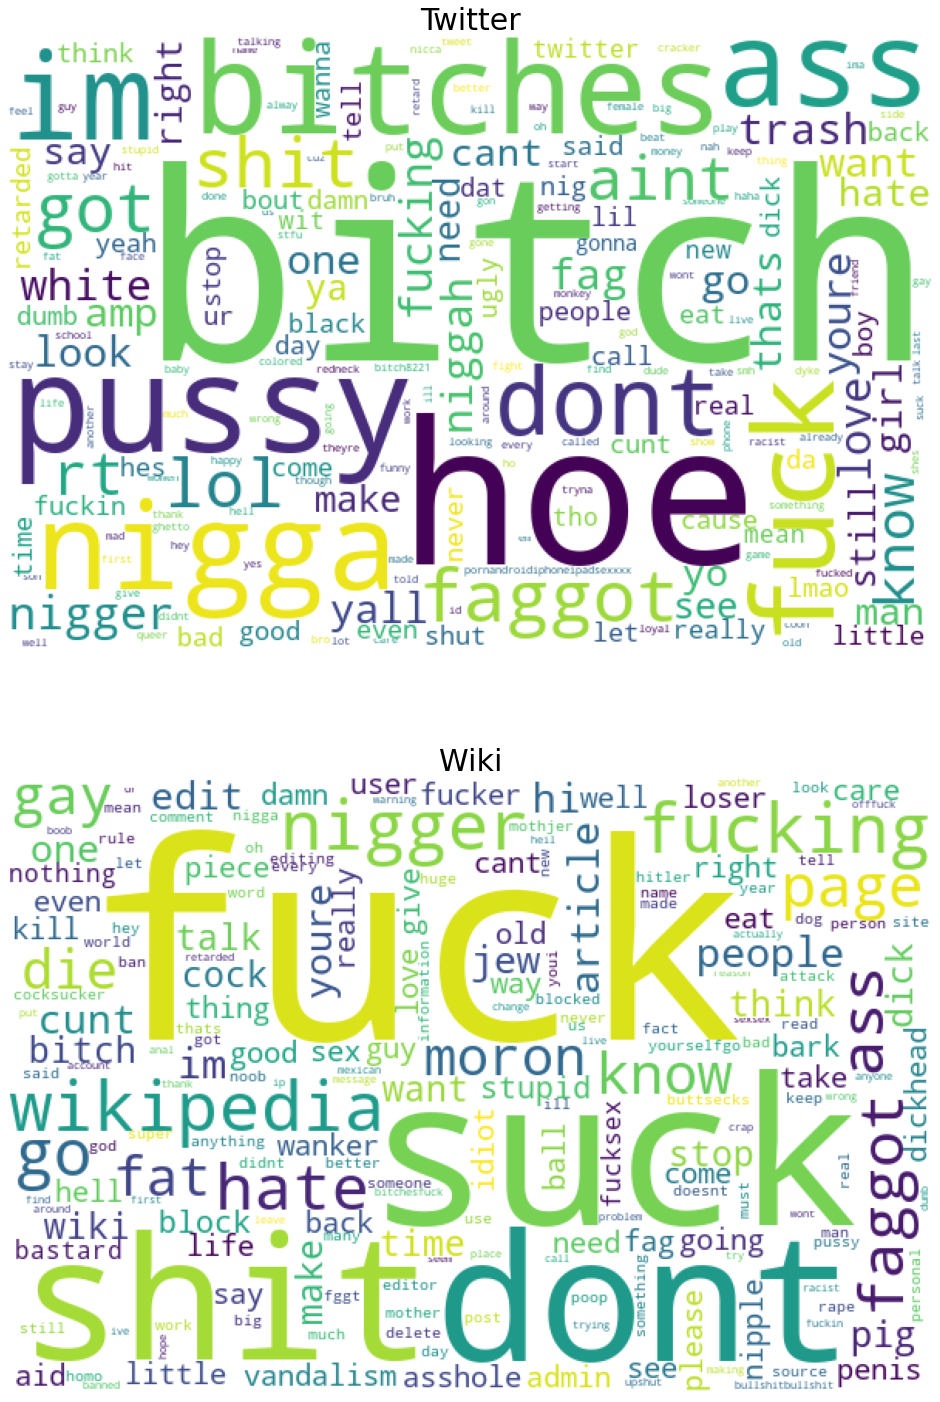

In [ ]:
from wordcloud import WordCloud

twitter = data1[data1['label']==1]['text']
forum = data2[data2['label']==1]['text']
wiki = data3[data3['label']==1]['text']


fig, axs = plt.subplots(2, figsize=[50, 25])

wordcloud1 = WordCloud( background_color='white',
                        width=600,
                        height=400,
                        collocations = False).generate(" ".join(twitter))

wordcloud3 = WordCloud( background_color='white',
                        width=600,
                        height=400,
                        collocations = False).generate(" ".join(wiki))
axs[0].imshow(wordcloud1)
axs[0].axis('off')
axs[0].set_title('Twitter',fontsize=30);

axs[1].imshow(wordcloud3)
axs[1].axis('off')
axs[1].set_title('Wiki',fontsize=30);


In [ ]:
data1[:train_size].groupby('label').count()[['text']]

,text
label,
0.0,2491
1.0,2509


In [ ]:
data2[:train_size].groupby('label').count()[['text']]

,text
label,
0.0,2455
1.0,2545


In [ ]:
data3[:train_size].groupby('label').count()[['text']]

,text
label,
0.0,2467
1.0,2533


In [ ]:
from collections import Counter

#count unique words
def counter_word(text):
    count = Counter()
    for i in text.values:
        for word in i.split():
            count[word]+=1
    return count

In [ ]:
counter = counter_word(merge_text)

In [ ]:
len(counter)

32142

In [ ]:
# the size of dictionary
num_words = len(counter)
num_1 = len(counter_word(train1_sentences))
num_2 = len(counter_word(train2_sentences))
num_3 = len(counter_word(train3_sentences))
#max number of words in a sequence
max_length = 50

**Tokenizer**

In [ ]:
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(merge_text)

word_index = tokenizer.word_index

train1_sequences = tokenizer.texts_to_sequences(train1_sentences)
test1_sequences = tokenizer.texts_to_sequences(test1_sentences)

train2_sequences = tokenizer.texts_to_sequences(train2_sentences)
test2_sequences = tokenizer.texts_to_sequences(test2_sentences)

train3_sequences = tokenizer.texts_to_sequences(train3_sentences)
test3_sequences = tokenizer.texts_to_sequences(test3_sentences)

train1_padded = pad_sequences(
    train1_sequences,maxlen = max_length, padding = "post", truncating = "post")
test1_padded = pad_sequences(
    test1_sequences,maxlen = max_length, padding = "post", truncating = "post")

train2_padded = pad_sequences(
    train2_sequences,maxlen = max_length, padding = "post", truncating = "post")
test2_padded = pad_sequences(
    test2_sequences,maxlen = max_length, padding = "post", truncating = "post")

train3_padded = pad_sequences(
    train3_sequences,maxlen = max_length, padding = "post", truncating = "post")
test3_padded = pad_sequences(
    test3_sequences,maxlen = max_length, padding = "post", truncating = "post")

In [ ]:
print(data1.text[1])
print(train1_sequences[1])
print(data2.text[1])
print(train2_sequences[1])
print(data3.text[1])
print(train3_sequences[1])

8220 hoes feel like photo didnt get enough favorites
[27, 90, 151, 2, 962, 104, 14, 272, 5261]
pakis asians even jungle bunnies come starts getting weird
[10639, 36, 9546, 8880, 103, 2567, 237, 1562]
hell man delete page savannah hoard screw dudei mean really youre gonna let page go fuck fat self 40 year old bitchyour total bitch goes around deleting peoples pages fucking disgust im gonna kick dorky ass ever see fat thing go fuck yourselfand fuck even go sex seashell never gettin girl fattard fat ass lardo bitch fucking 40 year old virginyour total bitchyou know thati hate go hell fat ass dorky fattard dorky lardo fat ass fucking bitch 40 year old birginbitch dis house better mess wit bitch
[198, 118, 209, 5, 7172, 17967, 1733, 17968, 175, 48, 35, 393, 152, 5, 12, 6, 143, 522, 1706, 244, 222, 17969, 939, 9, 337, 179, 448, 1090, 82, 25, 3684, 8, 393, 1423, 7173, 47, 127, 20, 143, 123, 12, 6, 17970, 6, 36, 12, 491, 17971, 74, 3372, 453, 9698, 143, 47, 9699, 9, 25, 1706, 244, 222, 17972, 

# check inverse

In [ ]:
reverse_word_index = dict([value,key] for (key,value) in word_index.items())

In [ ]:
def decode(text):
    return " ".join([reverse_word_index.get(i,"?") for i in text])

In [ ]:
decode(train1_sequences[0])

'ima keep giving pussy ass niggas ah reason hate'

In [ ]:
train1_padded.shape


(5000, 50)

In [ ]:
train2_padded.shape

(5000, 50)

In [ ]:
train3_padded.shape

(5000, 50)

In [ ]:
test1_padded.shape

(3000, 50)

In [ ]:
test2_padded.shape

(4400, 50)

In [ ]:
test3_padded.shape

(25000, 50)

build model

In [ ]:
from tensorflow.keras.layers import Input,LSTM,Bidirectional,Dense,Dropout,Concatenate,Embedding,GlobalMaxPool1D
from tensorflow.keras.models import Model
import tensorflow.keras.backend as K
from tensorflow.keras.utils import plot_model

K.clear_session()
###input
main_input = Input(shape=(max_length,), dtype='int32', name='main_input')

emb = Embedding(num_words, 128, input_length = max_length)(main_input)

###shared
shared = Bidirectional(LSTM(64))(emb)

#task1_dense = Dense(32, activation='relu')(shared)
task1_output = Dense(1,activation = "sigmoid",name = "out1")(shared)

#task2_dense = Dense(32, activation='relu')(shared)
task2_output = Dense(1,activation = "sigmoid",name = "out2")(shared)


task3_output = Dense(1,activation = "sigmoid",name = "out3")(shared)


model_tweet = Model(inputs=[main_input], outputs=[task1_output], name='model1')
model_forum = Model(inputs=[main_input], outputs=[task2_output], name='model2')
model_wiki = Model(inputs=[main_input], outputs=[task3_output], name='model3')

model_tweet.summary()
model_forum.summary()
model_wiki.summary()

model_tweet.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_forum.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_wiki.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "model1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 50)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 50, 128)           4114176   
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               98816     
_________________________________________________________________
out1 (Dense)                 (None, 1)                 129       
Total params: 4,213,121
Trainable params: 4,213,121
Non-trainable params: 0
_________________________________________________________________
Model: "model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      [(None, 50)]              0         
__________________________________

In [ ]:
val1_x = test1_padded[:1000]
val1_y = test1_labels[:1000]

val2_x = test2_padded[:1000]
val2_y = test2_labels[:1000]

val3_x = test3_padded[:1000]
val3_y = test3_labels[:1000]

In [ ]:
import numpy as np, random

BATCH_SIZE = 32
loss1_min = float('inf')
loss2_min = float('inf')
loss3_min = float('inf')

for batch in range(1500):
  a = random.uniform(0,1)
  if a >= 0 and a < 1/3:
    sample = np.random.randint(0, len(train1_padded), BATCH_SIZE)
    x_sampled, y_sampled = train1_padded[sample], train1_labels[sample]
    model_tweet.train_on_batch(x_sampled, y_sampled)

    res1 = model_tweet.test_on_batch(val1_x, val1_y, sample_weight=None, reset_metrics=True, return_dict= True)
    loss1 = res1.get('loss')
    if loss1 < loss1_min:
      loss1_min = loss1
      model_tweet.save('tweet_model')

  elif a >= 1/3 and a < 2/3:
    sample = np.random.randint(0, len(train2_padded), BATCH_SIZE)
    x_sampled, y_sampled = train2_padded[sample], train2_labels[sample]
    model_forum.train_on_batch(x_sampled, y_sampled)

    res2 = model_forum.test_on_batch(val2_x, val2_y, sample_weight=None, reset_metrics=True, return_dict= True)
    loss2 = res2.get('loss')
    if loss2 < loss2_min:
      loss2_min = loss2
      model_forum.save('forum_model')

  elif a >= 2/3 and a <= 1:
    sample = np.random.randint(0, len(train3_padded), BATCH_SIZE)
    x_sampled, y_sampled = train3_padded[sample], train3_labels[sample]
    model_wiki.train_on_batch(x_sampled, y_sampled)

    res3 = model_wiki.test_on_batch(val3_x, val3_y, sample_weight=None, reset_metrics=True, return_dict= True)
    loss3 = res3.get('loss')
    if loss3 < loss3_min:
      loss3_min = loss3
      model_wiki.save('wiki_model')


In [ ]:
tweet_model = keras.models.load_model("tweet_model")
forum_model = keras.models.load_model("forum_model")
wiki_model = keras.models.load_model("wiki_model")

In [ ]:
y_tweet_prob = tweet_model.predict(test1_padded[1000:])
y_tweet_predict = (y_tweet_prob > 0.5).astype('int32')

In [ ]:
from sklearn.metrics import classification_report
target_names =  ['class 0', 'class 1']
print(classification_report(test1_labels[1000:], y_tweet_predict, target_names=target_names, digits = 4))

              precision    recall  f1-score   support

     class 0     0.9132    0.9187    0.9159      1008
     class 1     0.9168    0.9113    0.9141       992

    accuracy                         0.9150      2000
   macro avg     0.9150    0.9150    0.9150      2000
weighted avg     0.9150    0.9150    0.9150      2000



In [ ]:
y_forum_prob = forum_model.predict(test2_padded[1000:])
y_forum_predict = (y_forum_prob > 0.5).astype('int32')

In [ ]:
from sklearn.metrics import classification_report
target_names =  ['class 0', 'class 1']
print(classification_report(test2_labels[1000:], y_forum_predict, target_names=target_names, digits = 4))

In [ ]:
y_wiki_prob = wiki_model.predict(test3_padded[1000:])
y_wiki_predict = (y_wiki_prob > 0.5).astype('int32')

In [ ]:
print(classification_report(test3_labels[1000:], y_wiki_predict, target_names=target_names, digits = 4))

              precision    recall  f1-score   support

     class 0     0.8378    0.8946    0.8653     12054
     class 1     0.8859    0.8252    0.8545     11946

    accuracy                         0.8601     24000
   macro avg     0.8618    0.8599    0.8599     24000
weighted avg     0.8617    0.8601    0.8599     24000

